At Nielsen, we measure advertising effectiness of a campaign by modeling sales as a function of media data. The objective of this assignment is to walk through one such problem instance.

Inputs provided in the **Data files** folder:

**Sales data** (sales_data.csv): Sales volume for the target brand and competitor brand at the household-store-date level

**Price data** (price_data_*.txt): Price for the target brand at the store-date level

**Media data** (media_data.csv): Number of times a household was exposed to an ad on a given site on a given day. Note that it is not necessary that all households were exposed to all sites across time.

**Demographic data** (demo_data.csv): Annual income at the household level



Please load the data provided the google folder into the notebook. Perform a quality check of the data and if required, ‘clean’ it using your best judgement.

## Importing Data and Packages

In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import display

In [ ]:
# URL of the repository
base_url = 'https://raw.githubusercontent.com/Abhik-hazra/Assess_Niel_data/main/'

# List of file names
file_names = ['media_data', 'sales_data', 'demo_data','price_data_0', 'price_data_1', 'price_data_2', 'price_data_3', 'price_data_4', 'price_data_5']

# Dictionary to store DataFrames
dfs = {}

# Loop over each file name
for file_name in file_names:
    # Construct the URL for the file
    file_url = base_url + file_name + '.csv'
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_url)
    # Add the DataFrame to the dictionary with the file name as key
    dfs[file_name] = df

## Looking at the Dataframes imported

In [ ]:
display(dfs['media_data'])

,household_id,date,site,value
0,HH0001,01/01/21,TradeDesk,2
1,HH0001,01/01/21,Spotify,4
2,HH0001,03/01/21,Facebook,3
3,HH0001,04/01/21,Facebook,3
4,HH0001,04/01/21,Spotify,5
...,...,...,...,...
60893,HH1000,22/02/21,Spotify,6
60894,HH1000,23/02/21,TradeDesk,2
60895,HH1000,24/02/21,Facebook,3
60896,HH1000,25/02/21,Spotify,5


In [ ]:
display(dfs['demo_data'])

,household_id,annual_income,Currency
0,1,139000,USD
1,2,96000,USD
2,3,122000,USD
3,4,128000,CAD
4,5,132000,USD
...,...,...,...
995,996,127000,USD
996,997,71000,CAD
997,998,96000,USD
998,999,41000,USD


In [ ]:
display(dfs['sales_data'])

,household_id,store_id,date,target_sales_volume,competitor_sales_volume
0,1,3,29/01/21,0.00,0.00
1,1,4,21/01/21,0.00,4.54
2,1,9,01/01/21,0.00,3.55
3,1,9,23/02/21,0.00,5.10
4,1,12,03/01/21,0.00,0.00
...,...,...,...,...,...
49995,1000,87,28/01/21,5.67,4.87
49996,1000,90,20/01/21,0.00,4.10
49997,1000,92,26/02/21,4.79,0.00
49998,1000,94,14/02/21,0.00,3.69


In [ ]:
display(dfs['price_data_0'])

,store_id,date,target_price
0,STORE_1,01/01/21,2.67
1,STORE_1,02/01/21,3.30
2,STORE_1,03/01/21,3.08
3,STORE_1,04/01/21,0.00
4,STORE_1,05/01/21,2.83
...,...,...,...
964,STORE_23,07/02/21,0.00
965,STORE_23,08/02/21,2.95
966,STORE_23,09/02/21,2.87
967,STORE_23,10/02/21,3.20


In [ ]:
display(dfs['price_data_2'])

,store_id,date,target_price
0,STORE_39,23/01/21,2.95
1,STORE_39,24/01/21,3.06
2,STORE_39,25/01/21,3.68
3,STORE_39,26/01/21,3.34
4,STORE_39,27/01/21,0.00
...,...,...,...
964,STORE_53,26/02/21,2.81
965,STORE_54,01/01/21,2.85
966,STORE_54,02/01/21,0.00
967,STORE_54,03/01/21,3.39


## Data Quality and Checks

### Cleaning some of the columns like Household_id and Store_id to have the right suffix, so that it doesn't cause any error in the later stages.

In [ ]:
import warnings

def run_code_block():
    """
     Created this function to left pad HH00.. to Household id and STORE_ to store_id
    """

    # Update 'household_id' values in 'sales_data' DataFrame
    dfs['sales_data']['household_id'] = dfs['sales_data']['household_id'].apply(lambda x: f'HH{x:04d}')

    # Update 'household_id' values in 'demo_data' DataFrame
    dfs['demo_data']['household_id'] = dfs['demo_data']['household_id'].apply(lambda x: f'HH{x:04d}')

    # Update 'household_id' values in 'demo_data' DataFrame
    dfs['sales_data']['store_id'] = dfs['sales_data']['store_id'].apply(lambda x: f"STORE_{x}")

    # Ask the user if they are sure they want to run the code block
    response = input("Are you sure you want to run this block? (yes/no): Say yes for first time run.").lower()
    if response != 'yes':
        warnings.warn("The code block was not executed.")
        return

    # Continue executing the code block if the user confirms
    print("Executing the code block...")

# Call the function to run the code block
run_code_block()





Are you sure you want to run this block? (yes/no): Say yes for first time run.yes
Executing the code block...


### Viewing the data types and shapes of the Dataframes

In [ ]:
# Iterate over each DataFrame in the dictionary
for file_name, df in dfs.items():
    # Print the file name
    print("File Name:", file_name)
    # Print the shape of the DataFrame
    print("Shape:", df.shape)
    # Print the list of columns in the DataFrame
    print("The Columns are:", df.columns.tolist())
    print()  # Add a blank line for separation
    print("The Datatypes of the columns are:")
    print(df.dtypes)
    print()  # Add a blank line for separation
    print()  # Add a blank line for separation

File Name: media_data
Shape: (60898, 4)
The Columns are: ['household_id', 'date', 'site', 'value']

The Datatypes of the columns are:
household_id    object
date            object
site            object
value            int64
dtype: object


File Name: sales_data
Shape: (50000, 5)
The Columns are: ['household_id', 'store_id', 'date', 'target_sales_volume', 'competitor_sales_volume']

The Datatypes of the columns are:
household_id                object
store_id                    object
date                        object
target_sales_volume        float64
competitor_sales_volume    float64
dtype: object


File Name: demo_data
Shape: (1000, 3)
The Columns are: ['household_id', 'annual_income', 'Currency']

The Datatypes of the columns are:
household_id     object
annual_income     int64
Currency         object
dtype: object


File Name: price_data_0
Shape: (969, 3)
The Columns are: ['store_id', 'date', 'target_price']

The Datatypes of the columns are:
store_id         object
date       

* From the above, we see that all the price data have 969 rows and has three columns.
* Sales data table have the majority of the columns
* Media data needed to be cleaned before using it
* Demographic data has 1000 rows. Will need to check the unique ness of the Household_id
* Next I want to check the max and min of the date, but we also see that the date columns have the datatype as 'object'. So we will make into a datatime format and also to see them to dd/mm/yy

### Looking into the max and minimum dates of all the files.

In [ ]:
# To convert the 'date' columns to datetime format and then display the maximum
# and minimum dates, you can use the pd.to_datetime() function to convert the
# column to datetime format and then use the min() and max() functions to find
# the minimum and maximum dates. Here's how you can do it:

# Iterate over each DataFrame in the dictionary
for file_name, df in dfs.items():
    # Check if 'date' column exists in the DataFrame
    if 'date' in df.columns:
        # Convert the 'date' column to datetime format
        df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y')

        # Print the file name
        print("File Name:", file_name)

        # Print the minimum and maximum dates
        min_date = df['date'].min().strftime('%d/%m/%y')
        max_date = df['date'].max().strftime('%d/%m/%y')
        print("First Date:", min_date)
        print("Last Date:", max_date)
        print()
    else:
        print("File Name:", file_name)
        print("No 'date' column found.")
        print()

File Name: media_data
First Date: 01/01/21
Last Date: 26/02/21

File Name: sales_data
First Date: 01/01/21
Last Date: 26/02/21

File Name: demo_data
No 'date' column found.

File Name: price_data_0
First Date: 01/01/21
Last Date: 26/02/21

File Name: price_data_1
First Date: 01/01/21
Last Date: 26/02/21

File Name: price_data_2
First Date: 01/01/21
Last Date: 26/02/21

File Name: price_data_3
First Date: 01/01/21
Last Date: 26/02/21

File Name: price_data_4
First Date: 01/01/21
Last Date: 26/02/21

File Name: price_data_5
First Date: 01/01/21
Last Date: 26/02/21



## Creating the TBL column

Using the sales data, create a variable called target_brand_loyalty (TBL) that is calculated as
follows:

$𝑇𝐵𝐿_{ℎ,𝑡} = \frac{\sum _{t-1}^{t-28} 𝑡𝑎𝑟𝑔𝑒𝑡\_𝑠𝑎𝑙𝑒𝑠\_𝑣𝑜𝑙𝑢𝑚𝑒_{ℎ,𝑡}}{(\sum _{t-1}^{t-28} (𝑡𝑎𝑟𝑔𝑒𝑡\_𝑠𝑎𝑙𝑒𝑠\_𝑣𝑜𝑙𝑢𝑚𝑒_{ℎ,𝑡} + 𝑐𝑜𝑚𝑝𝑒𝑡𝑖𝑡𝑜𝑟\_𝑠𝑎𝑙𝑒𝑠\_𝑣𝑜𝑙𝑢𝑚𝑒_{ℎ,𝑡})}
∀𝑠 ∈ 𝑆
$


Where

$h$ = household_id

$t$ = date

$s$ = store

$S$ = set of all stores


In [ ]:
# Calculate the total target sales volume and competitor sales volume for each store, household, and date
total_target_sales = dfs['sales_data'].groupby(['store_id', 'household_id', 'date'])['target_sales_volume'].transform('sum')
total_competitor_sales = dfs['sales_data'].groupby(['store_id', 'household_id', 'date'])['competitor_sales_volume'].transform('sum')

# Calculate the TBL for each store, household, and date
dfs['sales_data']['TBL'] = total_target_sales / (total_target_sales + total_competitor_sales)

# Print the updated DataFrame with the new 'TBL' column
display(dfs['sales_data'])

,household_id,store_id,date,target_sales_volume,competitor_sales_volume,TBL
0,HH0001,STORE_3,2021-01-29,0.00,0.00,NaN
1,HH0001,STORE_4,2021-01-21,0.00,4.54,0.000000
2,HH0001,STORE_9,2021-01-01,0.00,3.55,0.000000
3,HH0001,STORE_9,2021-02-23,0.00,5.10,0.000000
4,HH0001,STORE_12,2021-01-03,0.00,0.00,NaN
...,...,...,...,...,...,...
49995,HH1000,STORE_87,2021-01-28,5.67,4.87,0.537951
49996,HH1000,STORE_90,2021-01-20,0.00,4.10,0.000000
49997,HH1000,STORE_92,2021-02-26,4.79,0.00,1.000000
49998,HH1000,STORE_94,2021-02-14,0.00,3.69,0.000000


## Annual Income into categories

Using the demographic data, code the annual income as a categorical variable with the values
‘high’, ‘medium’, and ‘low’ using your best judgement.


In [ ]:
# Convert Currency to USD
conversion_rate = 1.37
dfs['demo_data']['Income_USD'] = dfs['demo_data'].apply(lambda row: row['annual_income'] if row['Currency'] == 'USD' else row['annual_income'] * conversion_rate, axis=1)


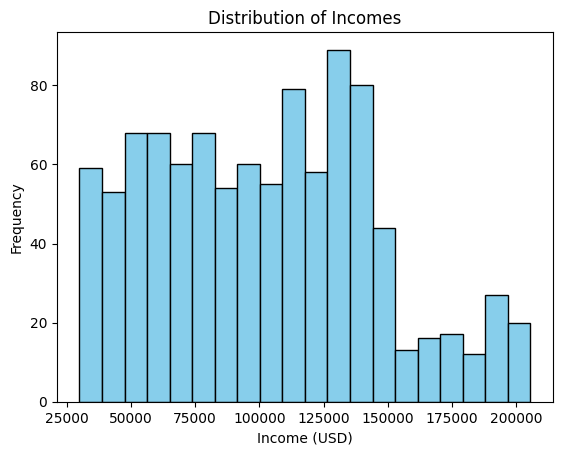

In [ ]:
# Plotting the Distribution of Incomes
plt.hist(dfs['demo_data']['Income_USD'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Incomes')
plt.show()


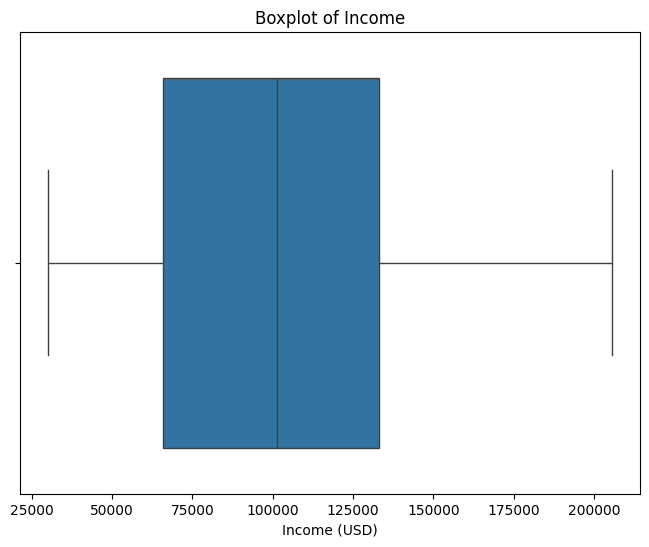

In [ ]:
import seaborn as sns

# Create a boxplot of Income_USD
plt.figure(figsize=(8, 6))
sns.boxplot(x=dfs['demo_data']['Income_USD'])
plt.xlabel('Income (USD)')
plt.title('Boxplot of Income')
plt.show()

In [ ]:
# Calculate Z-score for Income_USD
from scipy.stats import zscore

# Compute the Z-score for each data point
z_scores = zscore(dfs['demo_data']['Income_USD'])

# Set the threshold for identifying outliers (usually |Z-score| > 3)
threshold = 3

# Identify outliers
outliers = dfs['demo_data'][abs(z_scores) > threshold]

# Print the outliers
print("Outliers identified using Z-score method:")
print(outliers)

Outliers identified using Z-score method:
Empty DataFrame
Columns: [household_id, annual_income, Currency, Income_USD]
Index: []


In [ ]:
# Categorize Incomes into High, Medium, and Low
percentiles = [0, 1/3, 2/3, 1]
income_categories = ['low', 'medium', 'high']
dfs['demo_data']['Income_Category'] = pd.qcut(dfs['demo_data']['Income_USD'], percentiles, labels=income_categories)

In [ ]:
display(dfs['demo_data'])

,household_id,annual_income,Currency,Income_USD,Income_Category
0,HH0001,139000,USD,139000.0,high
1,HH0002,96000,USD,96000.0,medium
2,HH0003,122000,USD,122000.0,medium
3,HH0004,128000,CAD,175360.0,high
4,HH0005,132000,USD,132000.0,high
...,...,...,...,...,...
995,HH0996,127000,USD,127000.0,high
996,HH0997,71000,CAD,97270.0,medium
997,HH0998,96000,USD,96000.0,medium
998,HH0999,41000,USD,41000.0,low


## Joinig of all the main data to the Sales data

Join the price, media, and demographic data to the sales data (i.e. the sales data is your base
dataset).

In [ ]:
# to start with joining the data, we need to append all the price data into a single table and then join

# List to store DataFrames
price_data_frames = []

# Iterate over each key in the dictionary
for key in dfs.keys():
    # Check if the key starts with 'price_data_'
    if key.startswith('price_data_'):
        # Append the DataFrame to the list
        price_data_frames.append(dfs[key])

# Concatenate all DataFrames in the list
combined_price_data = pd.concat(price_data_frames, ignore_index=True)

# Print the combined DataFrame
print(combined_price_data)


      store_id       date  target_price
0      STORE_1 2021-01-01          2.67
1      STORE_1 2021-01-02          3.30
2      STORE_1 2021-01-03          3.08
3      STORE_1 2021-01-04          0.00
4      STORE_1 2021-01-05          2.83
...        ...        ...           ...
5809  STORE_99 2021-02-23          2.81
5810  STORE_99 2021-02-24          3.47
5811  STORE_99 2021-02-25          3.28
5812  STORE_99 2021-02-25          0.00
5813  STORE_99 2021-02-26          3.27

[5814 rows x 3 columns]


In [ ]:
# Remove duplicate rows from the combined price DataFrame
combined_price_data = combined_price_data.drop_duplicates()

In [ ]:
# Check for duplicates in the filtered_data DataFrame
duplicate_rows = combined_price_data[combined_price_data.duplicated()]

# Print the duplicate rows, if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [ ]:
# Group by 'household_id', 'store_id', and 'date' and calculate the sum of 'target_sales_volume' and 'competitor_sales_volume'
aggregated_sales_data = dfs['sales_data'].groupby(['household_id', 'store_id', 'date','TBL']).agg({
    'target_sales_volume': 'sum',
    'competitor_sales_volume': 'sum'
}).reset_index()

# Print the first few rows of the aggregated sales data
print(aggregated_sales_data.head())


  household_id  store_id       date  TBL  target_sales_volume  \
0       HH0001  STORE_15 2021-02-10  0.0                  0.0   
1       HH0001  STORE_16 2021-02-01  0.0                  0.0   
2       HH0001  STORE_18 2021-01-21  0.0                  0.0   
3       HH0001  STORE_22 2021-02-20  0.0                  0.0   
4       HH0001  STORE_23 2021-02-04  0.0                  0.0   

   competitor_sales_volume  
0                     4.72  
1                     2.50  
2                     3.60  
3                     3.97  
4                     4.79  


In [ ]:
# Check for duplicate rows in merged_data
duplicate_aggregated_sales_data= aggregated_sales_data[aggregated_sales_data.duplicated()]

# Print duplicate rows, if any
if not duplicate_aggregated_sales_data.empty:
    print("Duplicate rows found in aggregated_sales_data:")
    print(duplicate_aggregated_sales_data)
else:
    print("No duplicate rows found in aggregated_sales_data.")


No duplicate rows found in aggregated_sales_data.


In [ ]:
# Left join sales_data with combined_price_data
# Merge the aggregated sales data with the combined price data using 'store_id' and 'date'
merged_data = pd.merge(aggregated_sales_data, combined_price_data, on=['store_id', 'date'], how='left')

# Print the merged DataFrame
display(merged_data)


,household_id,store_id,date,TBL,target_sales_volume,competitor_sales_volume,target_price
0,HH0001,STORE_15,2021-02-10,0.000000,0.00,4.72,2.93
1,HH0001,STORE_16,2021-02-01,0.000000,0.00,2.50,3.56
2,HH0001,STORE_18,2021-01-21,0.000000,0.00,3.60,0.00
3,HH0001,STORE_22,2021-02-20,0.000000,0.00,3.97,2.78
4,HH0001,STORE_23,2021-02-04,0.000000,0.00,4.79,3.11
...,...,...,...,...,...,...,...
43761,HH1000,STORE_86,2021-02-19,1.000000,4.78,0.00,3.29
43762,HH1000,STORE_87,2021-01-28,0.537951,5.67,4.87,2.73
43763,HH1000,STORE_90,2021-01-20,0.000000,0.00,4.10,2.94
43764,HH1000,STORE_92,2021-02-26,1.000000,4.79,0.00,0.00


In [ ]:
# Check for duplicate rows in merged_data
duplicate_merged_data = merged_data[merged_data.duplicated()]

# Print duplicate rows, if any
if not duplicate_merged_data.empty:
    print("Duplicate rows found in merged_data:")
    print(duplicate_merged_data)
else:
    print("No duplicate rows found in merged_data.")


No duplicate rows found in merged_data.


In [ ]:
# Check for duplicate rows in media_data
duplicate_media_data = dfs['media_data'][dfs['media_data'].duplicated()]

# Print duplicate rows, if any
if not duplicate_media_data.empty:
    print("Duplicate rows found in media_data:")
    print(duplicate_media_data)
else:
    print("No duplicate rows found in media_data.")


No duplicate rows found in media_data.


In [ ]:
# Check for duplicate rows in demo_data
duplicate_demo_data = dfs['demo_data'][dfs['demo_data'].duplicated()]

# Print duplicate rows, if any
if not duplicate_demo_data.empty:
    print("Duplicate rows found in demo_data:")
    print(duplicate_demo_data)
else:
    print("No duplicate rows found in demo_data.")


No duplicate rows found in demo_data.


In [ ]:

# Left join with demo_data
merged_data = pd.merge(merged_data, dfs['demo_data'], on='household_id', how='left')

# Left join with media_data
merged_data = pd.merge(merged_data, dfs['media_data'], on=['household_id', 'date'], how='left')

# Print the merged DataFrame
display(merged_data)

,household_id,store_id,date,TBL,target_sales_volume,competitor_sales_volume,target_price,annual_income,Currency,Income_USD,Income_Category,site,value
0,HH0001,STORE_15,2021-02-10,0.000000,0.00,4.72,2.93,139000,USD,139000.0,high,TradeDesk,2.0
1,HH0001,STORE_15,2021-02-10,0.000000,0.00,4.72,2.93,139000,USD,139000.0,high,Facebook,3.0
2,HH0001,STORE_16,2021-02-01,0.000000,0.00,2.50,3.56,139000,USD,139000.0,high,Spotify,4.0
3,HH0001,STORE_18,2021-01-21,0.000000,0.00,3.60,0.00,139000,USD,139000.0,high,NaN,NaN
4,HH0001,STORE_22,2021-02-20,0.000000,0.00,3.97,2.78,139000,USD,139000.0,high,TradeDesk,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58389,HH1000,STORE_86,2021-02-19,1.000000,4.78,0.00,3.29,65000,CAD,89050.0,medium,NaN,NaN
58390,HH1000,STORE_87,2021-01-28,0.537951,5.67,4.87,2.73,65000,CAD,89050.0,medium,Spotify,6.0
58391,HH1000,STORE_90,2021-01-20,0.000000,0.00,4.10,2.94,65000,CAD,89050.0,medium,Spotify,6.0
58392,HH1000,STORE_92,2021-02-26,1.000000,4.79,0.00,0.00,65000,CAD,89050.0,medium,Spotify,5.0


## Building a logistic regression

Use the last 4 weeks of sales data to build a logistic regression model to calculate the probability that a household will purchase the target brand (target_sales_volume > 0) at a given store on a given day using the following variables as predictors

• brand_loyalty

• target_price

• TradeDesk

• Facebook

• Spotify

• annual_income (categorical)

### Filtering data for 4 weeks.

In [ ]:
# Step 1: Find the maximum date in the DataFrame
max_date = merged_data['date'].max()

# Step 2: Calculate the date four weeks ago
four_weeks_ago = max_date - timedelta(weeks=4)

# Step 3: Filter the DataFrame for the last four weeks
filtered_data = merged_data[merged_data['date'] >= four_weeks_ago]


In [ ]:
# Print the merged DataFrame
display(filtered_data)

,household_id,store_id,date,TBL,target_sales_volume,competitor_sales_volume,target_price,annual_income,Currency,Income_USD,Income_Category,site,value
0,HH0001,STORE_15,2021-02-10,0.000000,0.00,4.72,2.93,139000,USD,139000.0,high,TradeDesk,2.0
1,HH0001,STORE_15,2021-02-10,0.000000,0.00,4.72,2.93,139000,USD,139000.0,high,Facebook,3.0
2,HH0001,STORE_16,2021-02-01,0.000000,0.00,2.50,3.56,139000,USD,139000.0,high,Spotify,4.0
4,HH0001,STORE_22,2021-02-20,0.000000,0.00,3.97,2.78,139000,USD,139000.0,high,TradeDesk,2.0
5,HH0001,STORE_22,2021-02-20,0.000000,0.00,3.97,2.78,139000,USD,139000.0,high,Facebook,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58382,HH1000,STORE_68,2021-02-23,0.599801,6.04,4.03,0.00,65000,CAD,89050.0,medium,TradeDesk,2.0
58385,HH1000,STORE_76,2021-02-21,1.000000,4.78,0.00,3.27,65000,CAD,89050.0,medium,Spotify,5.0
58389,HH1000,STORE_86,2021-02-19,1.000000,4.78,0.00,3.29,65000,CAD,89050.0,medium,NaN,NaN
58392,HH1000,STORE_92,2021-02-26,1.000000,4.79,0.00,0.00,65000,CAD,89050.0,medium,Spotify,5.0


In [ ]:
# List of values to keep for one-hot encoding
values_to_keep = ["TradeDesk", "Facebook", "Spotify"]

# Perform one-hot encoding for the selected values
one_hot_encoded_sites = pd.get_dummies(filtered_data['site'].apply(lambda x: x if x in values_to_keep else None))

# Rename the columns to reflect the original values
one_hot_encoded_sites.columns = [f"site_{value}" for value in values_to_keep]

# Convert True/False to 1/0
one_hot_encoded_sites = one_hot_encoded_sites.astype(int)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
filtered_data_encoded = pd.concat([filtered_data, one_hot_encoded_sites], axis=1)

# Print the first few rows of the encoded DataFrame
display(filtered_data_encoded)



,household_id,store_id,date,TBL,target_sales_volume,competitor_sales_volume,target_price,annual_income,Currency,Income_USD,Income_Category,site,value,site_TradeDesk,site_Facebook,site_Spotify
0,HH0001,STORE_15,2021-02-10,0.000000,0.00,4.72,2.93,139000,USD,139000.0,high,TradeDesk,2.0,0,0,1
1,HH0001,STORE_15,2021-02-10,0.000000,0.00,4.72,2.93,139000,USD,139000.0,high,Facebook,3.0,1,0,0
2,HH0001,STORE_16,2021-02-01,0.000000,0.00,2.50,3.56,139000,USD,139000.0,high,Spotify,4.0,0,1,0
4,HH0001,STORE_22,2021-02-20,0.000000,0.00,3.97,2.78,139000,USD,139000.0,high,TradeDesk,2.0,0,0,1
5,HH0001,STORE_22,2021-02-20,0.000000,0.00,3.97,2.78,139000,USD,139000.0,high,Facebook,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58382,HH1000,STORE_68,2021-02-23,0.599801,6.04,4.03,0.00,65000,CAD,89050.0,medium,TradeDesk,2.0,0,0,1
58385,HH1000,STORE_76,2021-02-21,1.000000,4.78,0.00,3.27,65000,CAD,89050.0,medium,Spotify,5.0,0,1,0
58389,HH1000,STORE_86,2021-02-19,1.000000,4.78,0.00,3.29,65000,CAD,89050.0,medium,NaN,NaN,0,0,0
58392,HH1000,STORE_92,2021-02-26,1.000000,4.79,0.00,0.00,65000,CAD,89050.0,medium,Spotify,5.0,0,1,0


In [ ]:
# Modify the 'target_sales_volume' column into a binary flag
filtered_data_encoded.loc[:, 'target_sales_flag'] = (filtered_data_encoded['target_sales_volume'] > 0).astype(int)


### Label encoding of the Income Flag

In [ ]:
# Define the mapping dictionary
income_mapping = {'high': 2, 'medium': 1, 'low': 0}

# Map the categories to their corresponding encoded values and assign to the new column using .loc[]
filtered_data_encoded.loc[:, 'encoded_income'] = filtered_data_encoded['Income_Category'].map(income_mapping)

# Print the first few rows of the DataFrame with the encoded 'Income_Category' column
print(filtered_data_encoded[['Income_Category', 'encoded_income']].head())

  Income_Category encoded_income
0            high              2
1            high              2
2            high              2
4            high              2
5            high              2


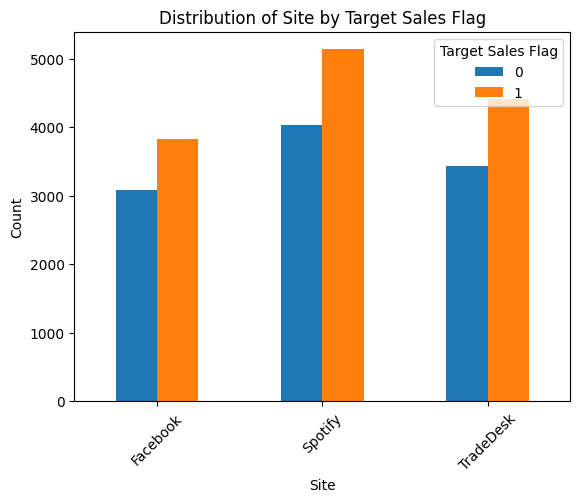

In [ ]:
import matplotlib.pyplot as plt

# Create a cross-tabulation of 'site' and 'target_sales_flag'
site_sales_crosstab = pd.crosstab(filtered_data_encoded['site'], filtered_data_encoded['target_sales_flag'])

# Plot the cross-tabulation as a bar plot with side-by-side bars
site_sales_crosstab.plot(kind='bar', stacked=False)
plt.xlabel('Site')
plt.ylabel('Count')
plt.title('Distribution of Site by Target Sales Flag')
plt.legend(title='Target Sales Flag', labels=['0', '1'], loc='upper right')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()



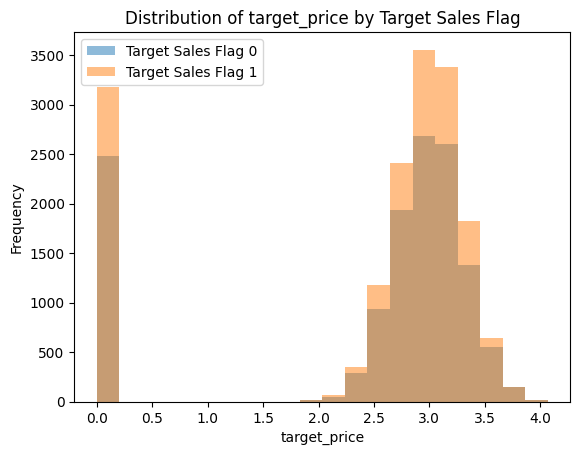

In [ ]:


# Separate 'price' values based on 'target_sales_flag'
price_sales_flag_0 = filtered_data_encoded[filtered_data_encoded['target_sales_flag'] == 0]['target_price']
price_sales_flag_1 = filtered_data_encoded[filtered_data_encoded['target_sales_flag'] == 1]['target_price']

# Plot histograms for 'target_price' based on 'target_sales_flag'
plt.hist(price_sales_flag_0, bins=20, alpha=0.5, label='Target Sales Flag 0')
plt.hist(price_sales_flag_1, bins=20, alpha=0.5, label='Target Sales Flag 1')
plt.xlabel('target_price')
plt.ylabel('Frequency')
plt.title('Distribution of target_price by Target Sales Flag')
plt.legend()
plt.show()

In [ ]:
# Subset and keep only the specified columns
final_data = filtered_data_encoded[['household_id', 'store_id', 'date', 'TBL', 'target_price', 'encoded_income', 'site_TradeDesk','site_Facebook','site_Spotify','target_sales_flag']].copy()


In [ ]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Define the predictor variables
predictor_cols = ['TBL', 'target_price', 'encoded_income', 'site_TradeDesk', 'site_Facebook', 'site_Spotify']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_data[predictor_cols], final_data['target_sales_flag'], test_size=0.2, random_state=42)


# Add a constant term to the predictor variables
X_train_sm = sm.add_constant(X_train)

# Fit the logistic regression model using statsmodels
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()

# Print the summary of the model
print(result.summary())


         Current function value: 0.000001
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:      target_sales_flag   No. Observations:                23841
Model:                          Logit   Df Residuals:                    23834
Method:                           MLE   Df Model:                            6
Date:                Mon, 29 Apr 2024   Pseudo R-squ.:                   1.000
Time:                        11:12:44   Log-Likelihood:              -0.017514
converged:                      False   LL-Null:                       -16342.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -35.4305    304.573     -0.116      0.907    -632.383     561.522
TBL              123.2518    772.988      0.159      0.873   -1391.777    1638.281
target_price       1.4562     19.866

In [ ]:
import seaborn as sns
sns.pairplot(final_data)

In [ ]:
# Save the DataFrame to a CSV file
final_data.to_csv('sample_data/final_data_niel.csv', index=False)

In [ ]:
!pip install rulefit

  Preparing metadata (setup.py) ... done
  Created wheel for rulefit: filename=rulefit-0.3.1-py3-none-any.whl size=7801 sha256=434976d5c8065a5ae05b8fdea05f73ce0b300e3e4462147d222b4f09a97630de
  Stored in directory: /root/.cache/pip/wheels/0d/e7/77/17919d2e417a6589ae77e0722a78f2287c308fca24af14c600
Successfully built rulefit


In [ ]:

from sklearn.ensemble import RandomForestRegressor

y = final_data.target_sales_flag




In [ ]:
X = final_data.drop(['target_sales_flag', 'household_id', 'date', 'store_id'], axis=1)


In [ ]:

from rulefit import RuleFit
# Create and Train RuleFit Model
rulefit = RuleFit(tree_generator=RandomForestRegressor(n_estimators = 100))
rulefit.fit(X.values, y, feature_names=X.columns)
rules = rulefit.get_rules()
rules = rules.sort_values('support', ascending=False)
rules.iloc[:15]

,rule,type,coef,support,importance
0,TBL,linear,0.000000e+00,1.000000,0.000000e+00
1,target_price,linear,0.000000e+00,1.000000,0.000000e+00
2,encoded_income,linear,-0.000000e+00,1.000000,0.000000e+00
3,site_TradeDesk,linear,-0.000000e+00,1.000000,0.000000e+00
4,site_Facebook,linear,-0.000000e+00,1.000000,0.000000e+00
5,site_Spotify,linear,0.000000e+00,1.000000,0.000000e+00
12,TBL > 0.15536437928676605,rule,0.000000e+00,0.566686,0.000000e+00
14,TBL > 0.15756823122501373,rule,0.000000e+00,0.565927,0.000000e+00
6,TBL > 0.15440356731414795,rule,9.990000e-01,0.564818,4.952850e-01
15,TBL > 0.16302447021007538,rule,0.000000e+00,0.564377,0.000000e+00


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import plotly.graph_objects as go

# Assuming 'final_data' contains the predictor variables and target variable
X = final_data[['TBL', 'target_price', 'encoded_income', 'site_TradeDesk', 'site_Facebook', 'site_Spotify']].values
y = final_data['target_sales_flag']

# Fit logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X, y)

# Create a meshgrid for decision boundary visualization using all six features
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Flatten the meshgrid and concatenate it to form input data
meshgrid_data = np.c_[xx.ravel(), yy.ravel()]
for i in range(2, X.shape[1]):  # Start from the third feature (index 2)
    meshgrid_data = np.c_[meshgrid_data, np.full(meshgrid_data.shape[0], X[:, i].mean())]  # Use mean value for other features

# Predict using the logistic regression model
Z = logreg_model.predict(meshgrid_data)
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
fig = go.Figure()

# Add decision boundary
fig.add_trace(go.Contour(x=xx[0], y=yy[:, 0], z=Z, colorscale='Viridis', showscale=False, opacity=0.5, name='Decision Boundary'))

# Add data points
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers', marker=dict(color=y, colorscale='Viridis', opacity=0.8), name='Data Points'))

# Customize layout
fig.update_layout(title='Logistic Regression Decision Boundary',
                  xaxis_title='TBL',
                  yaxis_title='Target Price',
                  legend=dict(x=0, y=1, bgcolor='rgba(255, 255, 255, 0.5)'))

# Show the interactive plot
fig.show()


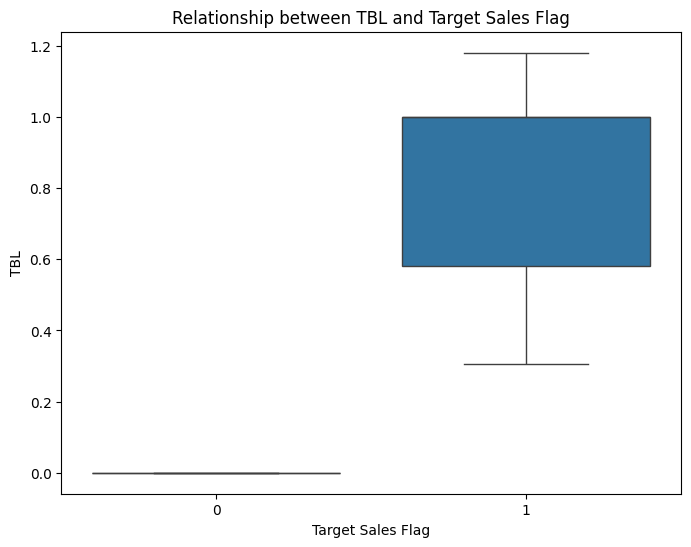

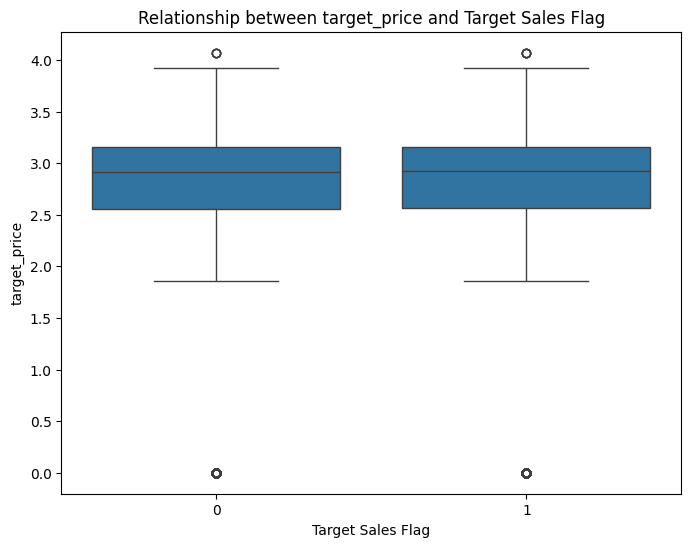

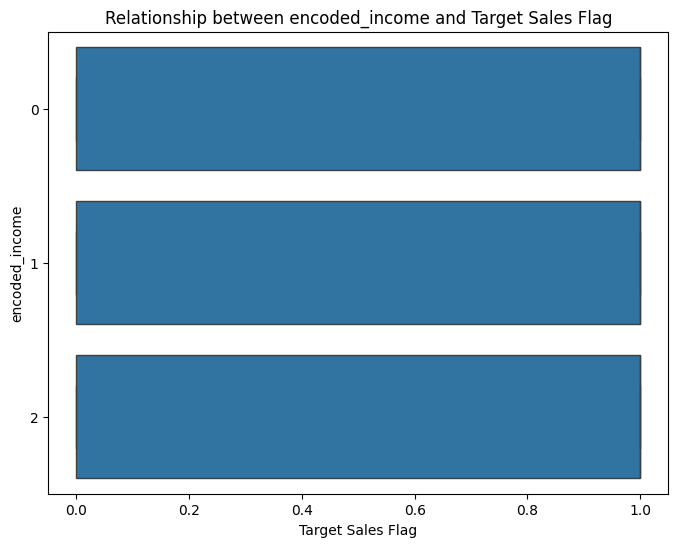

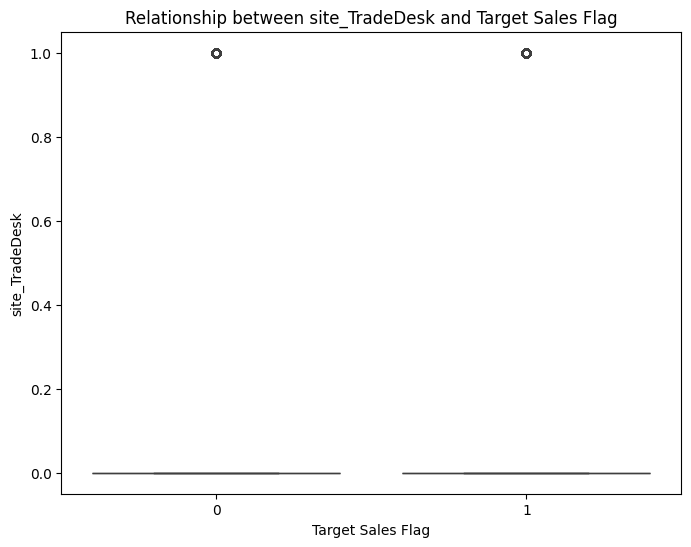

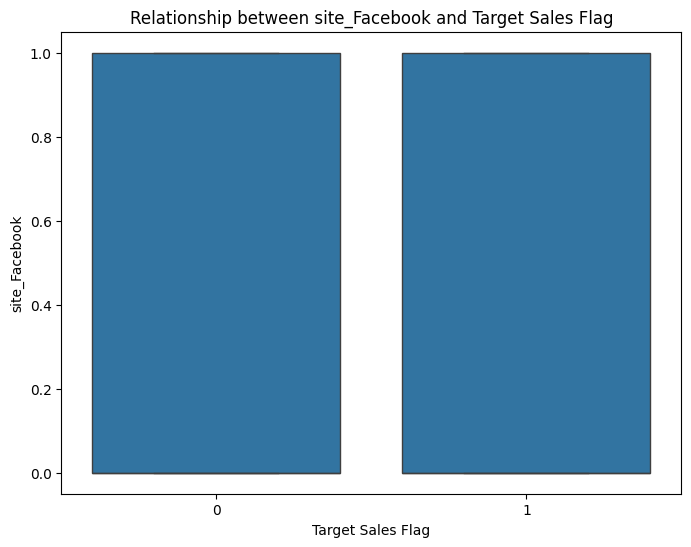

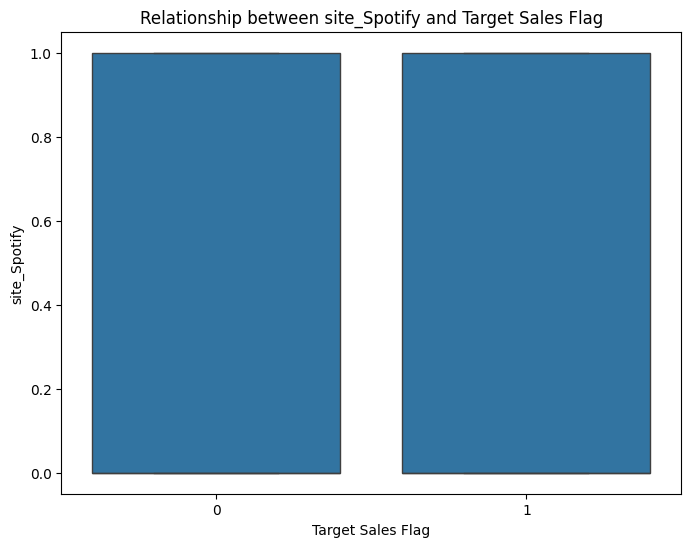

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'final_data' contains the predictor variables and target variable
predictor_variables = ['TBL', 'target_price', 'encoded_income', 'site_TradeDesk', 'site_Facebook', 'site_Spotify']

# Plot relationships between each predictor variable and the target variable
for variable in predictor_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target_sales_flag', y=variable, data=final_data)
    plt.title(f'Relationship between {variable} and Target Sales Flag')
    plt.xlabel('Target Sales Flag')
    plt.ylabel(variable)
    plt.show()


Output the coefficients for these variables along with their standard errors and p-values

Calculate the AUC of the model

In [ ]:
from sklearn.metrics import roc_auc_score

# Add a constant term to the predictor variables in the test set
X_test_sm = sm.add_constant(X_test)

# Predict probabilities on the test set
y_prob = result.predict(X_test_sm)

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)
print("AUC:", auc)


AUC: 1.0
